<img src="images/cads-logo.png" style="height: 100px;" align=left> 

# DA Capstone

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Queries** Use SQL to query the data

## Submission Guideline
The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.
3. One **Final Dataset** - in csv format

One zip file per group is to be uploaded on GDrive **by 2:30 pm of the last day**, including the jupyter notebook(s) and the powerpoint presentation indicating the names of all group members.


## Presentation Guideline


**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

## Objective
**Perform Exploratory Data Analysis for the Dataset Provided uisng Python, then load the data into a database using pandas and Solve the queries. The dataset is about customer purchasing history, and focused on determining potential customers.**

You have been provided with information such as customers spending for last sevral years, the amount of money spent,Number of inactive months and so on

## Data description
- Below is the description of each feature available in the dataset
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

##  Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Your Code Here

### Load the Data into Pandas Dataframe

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head(5)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


In [4]:
# View your data
#Your Code Here

# <font color=green>Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data.

### How big is the dataset? (number of rows, features and total datapoints)

In [5]:
data.shape

(4469, 25)

### What columns do we have?

In [6]:
data.columns

Index(['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

### What is the type of each column?



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?

#### Notice Some features have Dollar AND Comma. Remove the dollar sign and comma from these features

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')`

In [8]:
data.head(2)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00


In [9]:
item = 'Cust_Last_Purchase'
data[item]= data[item].str.replace('$','').astype(float)

item = 'Pur_latest'
data[item]= data[item].str.replace('$','').astype(float)

item = 'Pur_3_years_Avg'
data[item]= data[item].str.replace('$','').astype(float)

item = 'Pur_5_years_Avg'
data[item]= data[item].str.replace('$','').astype(float)

item = 'Pur_3_years_Avg_Indirect'
data[item]= round(data[item].str.replace('$','').astype(float),2)

item = 'Cust_Ann_Income'
data[item] = data[item].str.replace(',','').str.replace('$','').astype(float)

### Check data for duplicate rows

In [10]:
# Is there any duplicate in the data
data.duplicated().any()

True

In [11]:
data

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2,17,2,4,0.0,7.50,7.76,...,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1,7,0,3,25.0,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,0.0
2,0,88003,NaN,5,12,3,5,15.0,15.00,11.25,...,53,6,17,22,S,1,79.0,F,U,0.0
3,1,188721,20.0,1,11,0,3,20.0,20.00,12.45,...,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3,15,2,7,3.0,4.33,3.80,...,63,6,12,24,S,1,68.0,F,H,113663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,1,103926,5.0,5,24,3,14,9.0,7.80,6.21,...,71,3,11,28,S,1,17.0,M,H,29081.0
4465,1,103920,5.0,4,7,2,2,5.0,6.25,5.71,...,19,4,10,8,A,0,43.0,M,U,29081.0
4466,1,114820,10.0,5,17,4,9,10.0,8.40,6.29,...,47,4,13,17,S,1,NaN,F,U,0.0
4467,1,103953,5.0,4,19,3,8,2.5,2.63,2.32,...,48,4,9,16,A,0,NaN,F,U,45281.0


In [12]:
# Find the number of duplicates
data[data.duplicated()].count()

Potential_Customer          851
C_ID                        851
Cust_Last_Purchase          413
Pur_3_years                 851
Pur_5_years                 851
Pur_3_years_Indirect        851
Pur_5_years_Indirect        851
Pur_latest                  851
Pur_3_years_Avg             851
Pur_5_years_Avg             851
Pur_3_years_Avg_Indirect    686
InAct_Last                  851
InAct_First                 851
Ad_Res_1_year               851
Ad_Res_3_Year               851
Ad_Res_5_Year               851
Ad_Res_Ind_1_Year           851
Ad_Res_Ind_3_Year           851
Ad_Res_Ind_5_Year           851
Status_Cust                 851
Status_Latest_Ad            851
Age                         685
Gender                      851
Cust_Prop                   851
Cust_Ann_Income             851
dtype: int64

In [13]:
x = sum(data.duplicated())
print(f"The number of occurence of duplicates are {x}")

The number of occurence of duplicates are 851


### Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [14]:
data = data.drop_duplicates()

In [15]:
data.duplicated().any()

False

### Do we need `C_ID` in our analysis?

In [16]:
data['C_ID'].head(5)

0      9946
1     87939
2     88003
3    188721
4     88056
Name: C_ID, dtype: int64

In [17]:
data = data.drop('C_ID',axis=1)

### Check whether the columns' types are accurate? if not handle them


In [18]:
data.dtypes

Potential_Customer            int64
Cust_Last_Purchase          float64
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect    float64
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
dtype: object

# <font color=green>Exploratory Data Analysis (EDA)<font>
Checking the relationship of variables, summary of data, outliers, filling missing values etc.

## Explore Categorical Variables

In [19]:
categorical = ['Status_Cust','Gender','Cust_Prop']

In [20]:
data[categorical].head(10)

,Status_Cust,Gender,Cust_Prop
0,A,F,H
1,A,M,U
2,S,F,U
3,A,F,U
4,S,F,H
5,A,F,H
6,A,M,H
7,A,M,H
8,S,F,H
9,S,M,H


### Explore Relationship Between Categorical & Target Variable

**Hint**: use `sns.countplot()` plot

<AxesSubplot:xlabel='Gender', ylabel='count'>

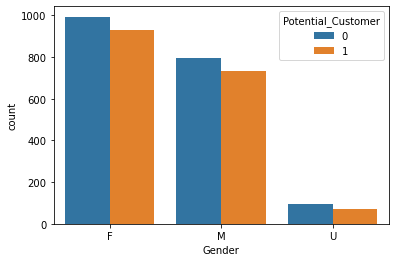

In [21]:
sns.countplot(x='Gender',data=data,hue='Potential_Customer')

<AxesSubplot:xlabel='Status_Cust', ylabel='count'>

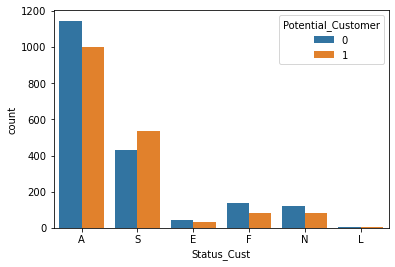

In [22]:
#combine efnl since they are insignificant
sns.countplot(x='Status_Cust',data=data,hue='Potential_Customer')


### Insight

In [23]:
data.head()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,5.0,2,17,2,4,0.0,7.50,7.76,7.50,...,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,30.0,1,7,0,3,25.0,25.00,13.00,NaN,...,55,6,6,22,A,1,7.0,M,U,0.0
2,0,NaN,5,12,3,5,15.0,15.00,11.25,14.67,...,53,6,17,22,S,1,79.0,F,U,0.0
3,1,20.0,1,11,0,3,20.0,20.00,12.45,NaN,...,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,5.0,3,15,2,7,3.0,4.33,3.80,4.00,...,63,6,12,24,S,1,68.0,F,H,113663.0


In [24]:
#highlight active and stars - potential customer
new_dict = {'A':'A','S':'S','E':'Others','F':'Others','N':'Others','L':'Others'}
data['Status_CustN'] = data['Status_Cust'].replace(new_dict)
data['Status_Cust'].unique()

array(['A', 'S', 'E', 'F', 'N', 'L'], dtype=object)

### Solution

## Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        1736 non-null   float64
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   float64
 7   Pur_3_years_Avg           3618 non-null   float64
 8   Pur_5_years_Avg           3618 non-null   float64
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

In [26]:
data.head(5).transpose()

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
Cust_Last_Purchase,5,30,NaN,20,5
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,0,25,15,20,3
Pur_3_years_Avg,7.5,25,15,20,4.33
Pur_5_years_Avg,7.76,13,11.25,12.45,3.8
Pur_3_years_Avg_Indirect,7.5,NaN,14.67,NaN,4


<AxesSubplot:xlabel='Pur_3_years'>

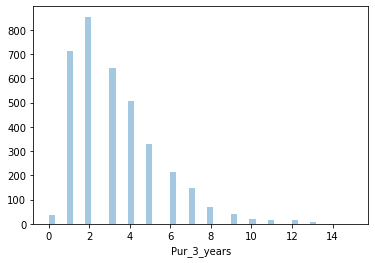

In [27]:
sns.distplot(data['Pur_3_years'],kde=False)

<AxesSubplot:xlabel='Pur_3_years'>

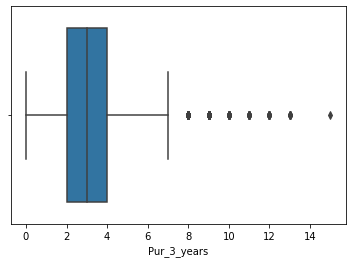

In [28]:
sns.boxplot(data['Pur_3_years'])

###  Check the skewness and kurtosis of the variables? Is it normal? Document your process in the notebook of handling skewness and kurtosis


In [29]:
data['Pur_3_years'].describe()


count    3618.000000
mean        3.308734
std         2.185492
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: Pur_3_years, dtype: float64

In [30]:
data['Pur_3_years'].median()

3.0

In [31]:
data_median = data['Pur_3_years'].median()
data_mean = data['Pur_3_years'].mean()
data_skew = skew(data['Pur_3_years'], bias=False)
data_kurt = kurtosis(data['Pur_3_years'], bias=False)

### Insight

In [32]:
print(f'The mean is {round(data_mean,2)} which is more than the median {round(data_median,2)}. Skew {round(data_skew,2)} is positive skew means that the tail is on the right side.')

The mean is 3.31 which is more than the median 3.0. Skew 1.29 is positive skew means that the tail is on the right side.


In [33]:
print(f'The kurtosis is {round(data_kurt,2)} which is a platy type')

The kurtosis is 2.12 which is a platy type


## Check the data for missing values?

In [34]:
# Count all NaN in each column
#Your Code Here

In [35]:
data.isnull().sum()

Potential_Customer             0
Cust_Last_Purchase          1882
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     662
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          793
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
Status_CustN                   0
dtype: int64

In [36]:
# Count all NaN in the dataframe (both columns & Rows)
#Your Code Here

In [37]:
data.isnull().sum().sum()

3337

### How should we handle missing values? (Should we drop the rows? or impute them with values?)

#### Handling Missing Value for `Cust_Last_Purchase` column

In [38]:
round(data.isnull().sum()[1]/len(data),2)

0.52

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        1736 non-null   float64
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   float64
 7   Pur_3_years_Avg           3618 non-null   float64
 8   Pur_5_years_Avg           3618 non-null   float64
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

In [41]:
#before
data['Cust_Last_Purchase']

0        5.0
1       30.0
2        NaN
3       20.0
4        5.0
        ... 
3613    20.0
3614     NaN
3615     NaN
3616     NaN
3617    21.0
Name: Cust_Last_Purchase, Length: 3618, dtype: float64

In [45]:
#after replace with mean
x = round(data['Cust_Last_Purchase'].mean(),2)
data['Cust_Last_Purchase'].fillna(x,inplace=True)
data['Cust_Last_Purchase']

0        5.00
1       30.00
2       14.56
3       20.00
4        5.00
        ...  
3613    20.00
3614    14.56
3615    14.56
3616    14.56
3617    21.00
Name: Cust_Last_Purchase, Length: 3618, dtype: float64

In [202]:
#after replace with 0
data['Cust_Last_Purchase'].fillna(0,inplace=True)
data['Cust_Last_Purchase']

0        5.0
1       30.0
2        0.0
3       20.0
4        5.0
        ... 
3613    20.0
3614     0.0
3615     0.0
3616     0.0
3617    21.0
Name: Cust_Last_Purchase, Length: 3618, dtype: float64

In [174]:
#data = data.drop('Cust_Last_Purchase',axis=1)

In [175]:
data.head(2)

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Status_CustN
0,1,5.0,2,17,2,4,0.0,7.5,7.76,7.5,...,3,12,16,A,0,71.0,F,H,65957.0,A
1,1,30.0,1,7,0,3,25.0,25.0,13.00,NaN,...,6,6,22,A,1,7.0,M,U,0.0,A


since the missing values for Cust_Last_Purchase is 0.52 which is more than 50%. so we drop it

#### Handling Missing Value for `Pur_3_years_Avg_Indirect` column 

In [46]:
item = 'Pur_3_years_Avg_Indirect'
m = data[item].mean()
data[item] = data[item].fillna(m)

the missing values are now replaced with mean

#### Handling Missing Value for `Age` column

Changes for Age is omitted since it is not relevant to change missing value of age to 0.

In [47]:
#Impute the missing values for Age column
item = 'Age'
m = 0
data[item] = data[item].fillna(m)

In [48]:
#Replace the missing values(values lower than 14) for Age column 
data.loc[data['Age'] < 14,'Age'] = data['Age'].median()

#### Handling Missing Value for `Cust_Ann_Income` column 

In [49]:
data['Cust_Ann_Income'].median()

44284.5

In [50]:
data['Cust_Ann_Income'].replace('0',data['Cust_Ann_Income'].median())

0        65957.0
1            0.0
2            0.0
3        76293.0
4       113663.0
          ...   
3613     83754.0
3614     83754.0
3615         0.0
3616     71618.0
3617         0.0
Name: Cust_Ann_Income, Length: 3618, dtype: float64

#### Handling Missing Value for `Gender` column

In [51]:
data['Gender'].mode()[0]

'F'

In [52]:
#Replace the missing values for Gender column
data['Gender'] = data['Gender'].replace('U',data['Gender'].mode()[0])

In [53]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [54]:
data.head(2)

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Status_CustN
0,1,5.0,2,17,2,4,0.0,7.5,7.76,7.500000,...,3,12,16,A,0,71.0,F,H,65957.0,A
1,1,30.0,1,7,0,3,25.0,25.0,13.00,13.582128,...,6,6,22,A,1,52.0,M,U,0.0,A


### Explore the Relationship between Numerical Variables & Target Variable

The “target variable” is the variable whose values are to be modeled and predicted by other variables.
https://www.dtreg.com/solution/classes-and-types-of-variables#:~:text=Target%20variable%20%2D%2D%20The%20%E2%80%9Ctarget,in%20a%20decision%20tree%20analysis.

<AxesSubplot:xlabel='Potential_Customer', ylabel='Pur_5_years'>

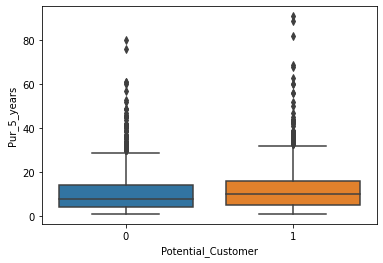

In [55]:
sns.boxplot(x='Potential_Customer',y='Pur_5_years',data=data)

In [56]:
#proof that our target variable is a binomial type
data['Potential_Customer'].value_counts()

0    1882
1    1736
Name: Potential_Customer, dtype: int64

In [57]:
data.columns

Index(['Potential_Customer', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income',
       'Status_CustN'],
      dtype='object')

<AxesSubplot:xlabel='Potential_Customer', ylabel='Pur_5_years'>

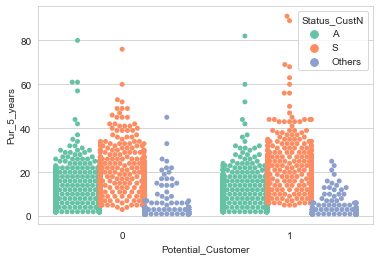

In [58]:
#SWARM HUE
target = 'Potential_Customer' #target variable
x = 'Pur_5_years'  #numerical variable

sns.set_style('whitegrid')
sns.swarmplot(x=target,y=x,data=data,hue='Status_CustN',palette = "Set2",split=True)

<AxesSubplot:xlabel='Potential_Customer', ylabel='Pur_5_years'>

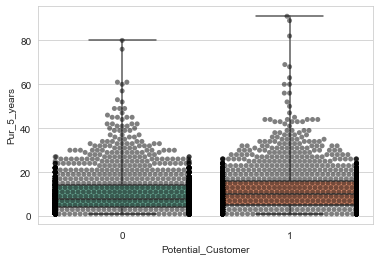

In [59]:
#BOX AND SWARM
target = 'Potential_Customer' #target variable
x = 'Pur_5_years'  #numerical variable

sns.set_style('whitegrid')
sns.boxplot(x=target,y=x,data=data,palette = "Set2",whis=np.inf)
sns.swarmplot(x=target,y=x,data=data,color='black',alpha=0.5)

<AxesSubplot:xlabel='Potential_Customer', ylabel='Pur_5_years'>

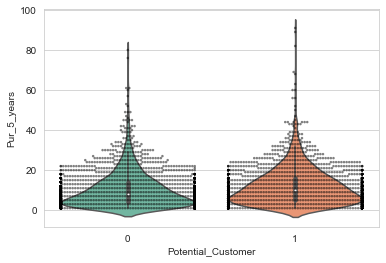

In [60]:
#VIOLIN AND SWARM
target = 'Potential_Customer' #target variable
x = 'Pur_5_years'  #numerical variable

sns.set_style('whitegrid')
sns.violinplot(x=target,y=x,data=data,palette = "Set2",scale='width')
sns.swarmplot(x=target,y=x,data=data,color='black',alpha=0.5,size=2.5)

# <font color=green>Insights through data visualization<font>

### Create a chart to visualize potential customer breakdown

<AxesSubplot:xlabel='Potential_Customer', ylabel='Pur_5_years'>

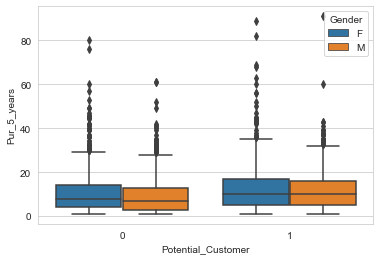

In [61]:
sns.boxplot(x='Potential_Customer',y='Pur_5_years',data=data,hue='Gender')

### How is the Age of the customers distributed? Plot your Answer with the appropriate chart

<AxesSubplot:xlabel='Age', ylabel='Density'>

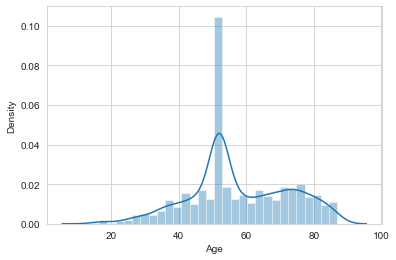

In [136]:
sns.distplot(data['Age'])

In [63]:
#if cust last purchase replace with mean
data.describe()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
count,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,...,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000
mean,0.479823,14.558919,3.308734,11.018795,1.909066,5.887507,15.267344,14.309536,11.913532,13.582128,...,73.807352,13.031786,29.598673,49.613875,5.403814,12.064400,19.508292,0.568546,57.719182,41608.894417
std,0.499662,8.010603,2.185492,9.405537,1.624995,4.904147,10.794970,10.060256,8.046675,8.793859,...,38.127214,4.941665,7.728158,22.864578,1.356644,4.569374,8.547971,0.495348,14.760653,26127.991993
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.750000,...,15.000000,3.000000,5.000000,7.000000,1.000000,2.000000,3.000000,0.000000,14.000000,0.000000
25%,0.000000,12.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,9.500000,...,40.000000,11.000000,26.000000,31.000000,5.000000,8.000000,13.000000,0.000000,51.000000,31385.750000
50%,0.000000,14.560000,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.295000,13.582128,...,74.000000,12.000000,31.000000,50.000000,6.000000,13.000000,20.000000,1.000000,52.000000,44284.500000
75%,1.000000,14.560000,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,14.787500,15.000000,...,111.000000,13.000000,33.000000,66.000000,6.000000,16.000000,27.000000,1.000000,70.000000,56508.000000
max,1.000000,200.000000,15.000000,91.000000,9.000000,41.000000,250.000000,260.000000,200.000000,260.000000,...,260.000000,49.000000,71.000000,157.000000,17.000000,28.000000,56.000000,1.000000,87.000000,174305.000000


In [193]:
data.describe()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
count,3618.000000,1736.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,...,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000
mean,0.479823,14.557748,3.308734,11.018795,1.909066,5.887507,15.267344,14.309536,11.913532,13.582128,...,73.807352,13.031786,29.598673,49.613875,5.403814,12.064400,19.508292,0.568546,57.719182,41608.894417
std,0.499662,11.566174,2.185492,9.405537,1.624995,4.904147,10.794970,10.060256,8.046675,8.793859,...,38.127214,4.941665,7.728158,22.864578,1.356644,4.569374,8.547971,0.495348,14.760653,26127.991993
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.750000,...,15.000000,3.000000,5.000000,7.000000,1.000000,2.000000,3.000000,0.000000,14.000000,0.000000
25%,0.000000,8.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,9.500000,...,40.000000,11.000000,26.000000,31.000000,5.000000,8.000000,13.000000,0.000000,51.000000,31385.750000
50%,0.000000,11.000000,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.295000,13.582128,...,74.000000,12.000000,31.000000,50.000000,6.000000,13.000000,20.000000,1.000000,52.000000,44284.500000
75%,1.000000,20.000000,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,14.787500,15.000000,...,111.000000,13.000000,33.000000,66.000000,6.000000,16.000000,27.000000,1.000000,70.000000,56508.000000
max,1.000000,200.000000,15.000000,91.000000,9.000000,41.000000,250.000000,260.000000,200.000000,260.000000,...,260.000000,49.000000,71.000000,157.000000,17.000000,28.000000,56.000000,1.000000,87.000000,174305.000000


### Explore the data by visualizing other features (such as customer annual income, distribution of gender)
- Start by asking questions that can add value to the business (example: how did my customers behaving lately?)
- Then continue by identifying which data are needed for the questions to be answered

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        3618 non-null   float64
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   float64
 7   Pur_3_years_Avg           3618 non-null   float64
 8   Pur_5_years_Avg           3618 non-null   float64
 9   Pur_3_years_Avg_Indirect  3618 non-null   float64
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

[Text(0.5, 0, 'Annual Customer Income ($)'), Text(0, 0.5, 'Density')]

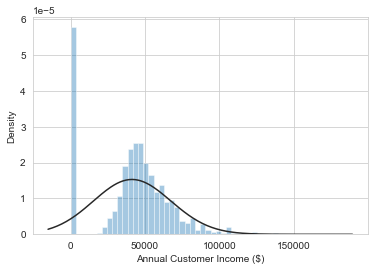

In [146]:
from scipy.stats import norm, skewnorm
sns.distplot(data['Cust_Ann_Income'],fit=skewnorm,kde=False
            ).set(xlabel= 'Annual Customer Income ($)',ylabel= 'Density' )

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Count')]

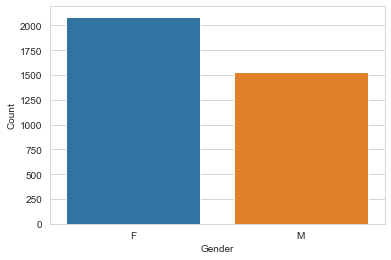

In [148]:
sns.countplot(data['Gender']).set(xlabel= 'Gender',ylabel= 'Count' )

[Text(0.5, 0, 'Ad_Res_1_year vs Ad_Res_3_Year'), Text(0, 0.5, 'Count')]

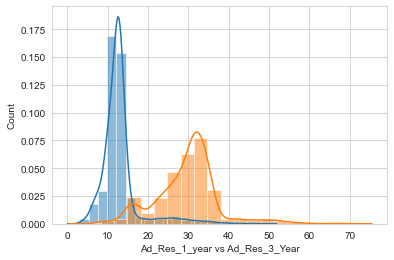

In [99]:
#ad responded in 1 year
sns.distplot(data['Ad_Res_1_year'],bins=20,hist_kws={"alpha": 0.5})
sns.distplot(data['Ad_Res_3_Year'],bins=20,hist_kws={"alpha": 0.5}
            ).set(xlabel='Ad_Res_1_year vs Ad_Res_3_Year', ylabel='Count')

<AxesSubplot:title={'center':'Distribution of customers based on Age grouped by Potential_Customer'}, xlabel='Potential_Customer', ylabel='Age'>

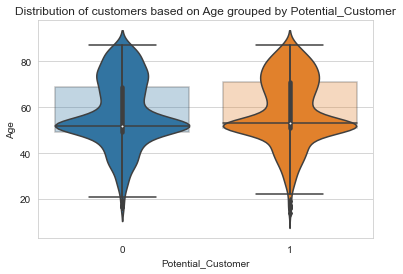

In [72]:
y = 'Potential_Customer' #target variable
x = 'Age'  #numerical variable

plt.title('Distribution of customers based on Age grouped by Potential_Customer')
sns.violinplot(x=target,y=x,data=data)    
sns.boxplot(x=target,y=x,data=data,boxprops=dict(alpha=.3))

### What is the distribution of customers' last purchase


<AxesSubplot:xlabel='Cust_Last_Purchase', ylabel='Density'>

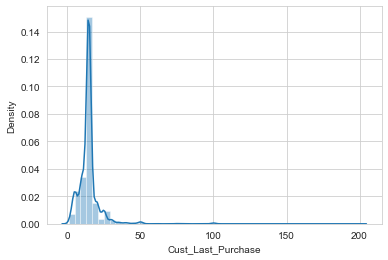

In [65]:
#if cust last purchase replace with mean
sns.distplot(data['Cust_Last_Purchase'])

<AxesSubplot:xlabel='Pur_5_years', ylabel='Density'>

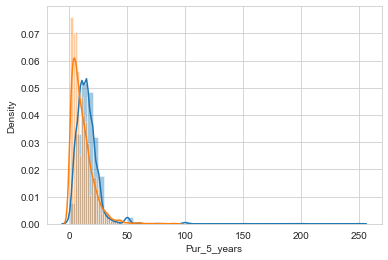

In [149]:
sns.distplot(data['Pur_latest'],)

sns.distplot(data['Pur_5_years'])

In [ ]:
#Your Code Here

### What's the Purchase amount pattern with regards to Gender

[Text(0, 0.5, 'Latest Purchases'), Text(0.5, 0, 'Gender')]

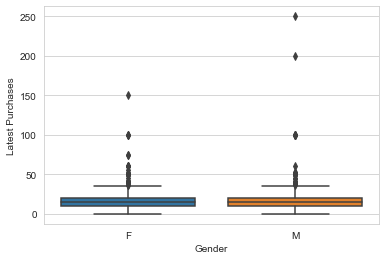

In [150]:
sns.boxplot(x= data['Gender'], y= data['Pur_latest'], data= data).set(ylabel= 'Latest Purchases', xlabel= 'Gender')

### On average, which group of gender has the higher latest purchase amount?


In [151]:
latpur = data[['Pur_latest','Gender']]
round(latpur.groupby(['Gender']).mean(),2)

,Pur_latest
Gender,
F,14.79
M,15.92


### What is the distribution of the status of our customers


<AxesSubplot:xlabel='Status_CustN', ylabel='count'>

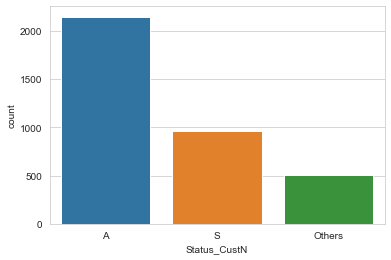

In [168]:
sns.countplot(x= data["Status_CustN"])

### What is the average number of purchase made in the last 3 years among different customer status


<AxesSubplot:xlabel='Status_CustN', ylabel='Pur_3_years_Avg'>

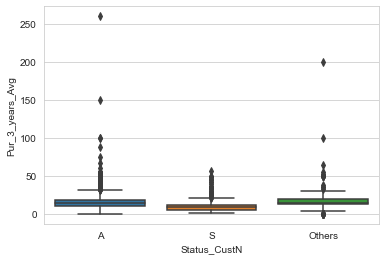

In [179]:
sns.boxplot(x= 'Status_CustN',y='Pur_3_years_Avg',data=data)

In [ ]:
#Your Code Here

### What is the average number of purchase made in the last 5 years among different customer status


<AxesSubplot:xlabel='Status_CustN', ylabel='Pur_5_years_Avg'>

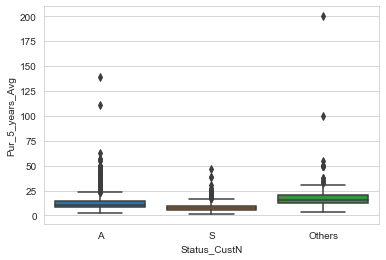

In [180]:
sns.boxplot(x= 'Status_CustN',y='Pur_5_years_Avg',data=data)

In [ ]:
#Your Code Here

### What is the distribution of the inactive number of months since last purchase?


<AxesSubplot:xlabel='InAct_Last', ylabel='count'>

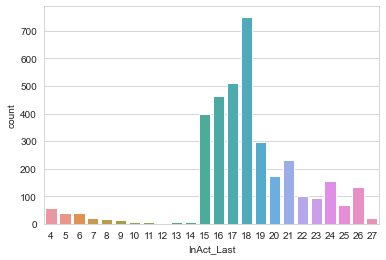

In [189]:

sns.countplot(x= data["InAct_Last"])

### What is the average number of purchase made in the last 3 years among different gender


<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years_Avg'>

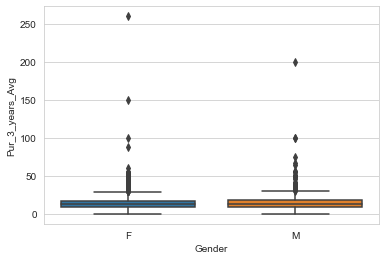

In [190]:
sns.boxplot(x= 'Gender',y='Pur_3_years_Avg',data=data)

### Check the distribution of customers who responded to ads in past 5 years with By Gender

#### Plot By gender

<AxesSubplot:xlabel='Gender', ylabel='Ad_Res_Ind_5_Year'>

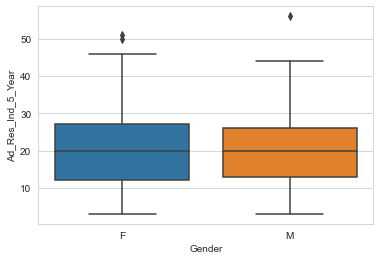

In [193]:
sns.boxplot(x= 'Gender',y='Ad_Res_Ind_5_Year',data=data)

#### Plot By Customer Status

<AxesSubplot:xlabel='Status_CustN', ylabel='Ad_Res_Ind_5_Year'>

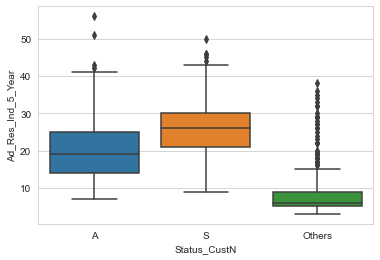

In [194]:
sns.boxplot(x= 'Status_CustN',y='Ad_Res_Ind_5_Year',data=data)

#### Plot By House Ownership

<AxesSubplot:xlabel='Cust_Prop', ylabel='Ad_Res_Ind_5_Year'>

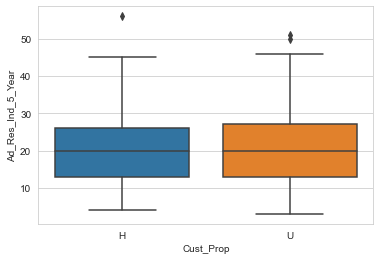

In [195]:
sns.boxplot(x= 'Cust_Prop',y='Ad_Res_Ind_5_Year',data=data)

#### Summarize your findings - what have you learned from your insights?

In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

# <font color=green>Feature Enginearing<font>
    
### We have too many Features? Do you think you can make some high level features? 

For example: Instead of three variables for number of ads responded by customer? why not create a single variable which shows ads responded in last three years

In [67]:
data.describe()

,Potential_Customer,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
count,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000
mean,0.479823,3.308734,11.018795,1.909066,5.887507,15.267344,14.309536,11.913532,13.582128,17.934218,73.807352,13.031786,29.598673,49.613875,5.403814,12.064400,19.508292,0.568546,57.719182,41608.894417
std,0.499662,2.185492,9.405537,1.624995,4.904147,10.794970,10.060256,8.046675,8.793859,4.145219,38.127214,4.941665,7.728158,22.864578,1.356644,4.569374,8.547971,0.495348,14.760653,26127.991993
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.750000,4.000000,15.000000,3.000000,5.000000,7.000000,1.000000,2.000000,3.000000,0.000000,14.000000,0.000000
25%,0.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,9.500000,16.000000,40.000000,11.000000,26.000000,31.000000,5.000000,8.000000,13.000000,0.000000,51.000000,31385.750000
50%,0.000000,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.295000,13.582128,18.000000,74.000000,12.000000,31.000000,50.000000,6.000000,13.000000,20.000000,1.000000,52.000000,44284.500000
75%,1.000000,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,14.787500,15.000000,20.000000,111.000000,13.000000,33.000000,66.000000,6.000000,16.000000,27.000000,1.000000,70.000000,56508.000000
max,1.000000,15.000000,91.000000,9.000000,41.000000,250.000000,260.000000,200.000000,260.000000,27.000000,260.000000,49.000000,71.000000,157.000000,17.000000,28.000000,56.000000,1.000000,87.000000,174305.000000


In [153]:
newcol = (data.Ad_Res_1_year + data.Ad_Res_3_Year + data.Ad_Res_5_Year)/3
data['Ad_Res_Avg'] = round(newcol,3)

In [154]:
data['Ad_Res_Avg']

0       51.000
1       34.333
2       34.000
3       42.000
4       34.667
         ...  
3613    31.333
3614    44.333
3615    36.333
3616    34.333
3617    39.000
Name: Ad_Res_Avg, Length: 3618, dtype: float64

In [155]:
data = data.drop(['Ad_Res_1_year','Ad_Res_3_Year'],axis=1)

In [157]:
data.head(5)

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Status_CustN,Ad_Res_Avg
0,1,5.00,2,17,2,4,0.0,7.50,7.76,7.500000,...,12,16,A,0,71.0,F,H,65957.0,A,51.000
1,1,30.00,1,7,0,3,25.0,25.00,13.00,13.582128,...,6,22,A,1,52.0,M,U,0.0,A,34.333
2,0,14.56,5,12,3,5,15.0,15.00,11.25,14.670000,...,17,22,S,1,79.0,F,U,0.0,S,34.000
3,1,20.00,1,11,0,3,20.0,20.00,12.45,13.582128,...,8,33,A,0,73.0,F,U,76293.0,A,42.000
4,1,5.00,3,15,2,7,3.0,4.33,3.80,4.000000,...,12,24,S,1,68.0,F,H,113663.0,S,34.667


# <font color=green>Feature Selection<font>

### Check the correlation among the variables

In [158]:
data[['Ad_Res_Avg','Ad_Res_5_Year']].corr()

,Ad_Res_Avg,Ad_Res_5_Year
Ad_Res_Avg,1.000000,0.962843
Ad_Res_5_Year,0.962843,1.000000


### Create a Heatmap of correlation between the variables

In [159]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income,Ad_Res_Avg
Potential_Customer,1.000000,-0.000140,0.147106,0.097972,0.135133,0.098305,-0.101008,-0.103504,-0.111500,-0.103976,-0.103023,0.070813,0.080109,0.063209,0.097746,0.073056,0.110590,0.030832,-0.021580,0.083545
Cust_Last_Purchase,-0.000140,1.000000,-0.235124,-0.150867,-0.200877,-0.166534,0.577057,0.462304,0.411139,0.399381,0.077839,-0.091641,-0.053682,-0.001057,-0.092784,-0.077327,-0.155911,-0.036238,0.042605,-0.028625
Pur_3_years,0.147106,-0.235124,1.000000,0.557350,0.842210,0.540581,-0.349252,-0.355583,-0.369803,-0.342964,-0.237964,0.190738,0.301513,0.344823,0.593459,0.330041,0.456353,0.061601,-0.074388,0.335822
Pur_5_years,0.097972,-0.150867,0.557350,1.000000,0.478441,0.905120,-0.260562,-0.248276,-0.339597,-0.227943,-0.241410,0.709486,0.790215,0.240929,0.427481,0.756462,0.580379,0.180510,-0.043361,0.720298
Pur_3_years_Indirect,0.135133,-0.200877,0.842210,0.478441,1.000000,0.566286,-0.296213,-0.293545,-0.292267,-0.249369,-0.168513,0.129750,0.231537,0.274756,0.639989,0.252604,0.424891,0.041433,-0.044092,0.254977
Pur_5_years_Indirect,0.098305,-0.166534,0.540581,0.905120,0.566286,1.000000,-0.266606,-0.257339,-0.361608,-0.227030,-0.157472,0.747152,0.750877,0.179324,0.457074,0.779955,0.641133,0.176198,-0.041983,0.647469
Pur_latest,-0.101008,0.577057,-0.349252,-0.260562,-0.296213,-0.266606,1.000000,0.786184,0.747429,0.652879,0.132908,-0.142707,-0.106823,0.001693,-0.133058,-0.121806,-0.273792,-0.049856,0.071228,-0.075828
Pur_3_years_Avg,-0.103504,0.462304,-0.355583,-0.248276,-0.293545,-0.257339,0.786184,1.000000,0.881783,0.838133,0.091458,-0.121262,-0.072774,0.019759,-0.115329,-0.096414,-0.265267,-0.049426,0.055722,-0.030622
Pur_5_years_Avg,-0.111500,0.411139,-0.369803,-0.339597,-0.292267,-0.361608,0.747429,0.881783,1.000000,0.724246,0.082255,-0.297026,-0.215725,-0.018264,-0.179683,-0.261724,-0.360026,-0.086666,0.062140,-0.161997
Pur_3_years_Avg_Indirect,-0.103976,0.399381,-0.342964,-0.227943,-0.249369,-0.227030,0.652879,0.838133,0.724246,1.000000,0.076473,-0.112813,-0.064515,0.009516,-0.035776,-0.091428,-0.245108,-0.035508,0.054122,-0.029703


### Summarize your findings - what have you learned from your insights?

within 5 years, the purchases done by customer mostly through direct advertisement.(orange with white numeric values)
(blue with white numerics)

### Find the Numerical Summary statistics for the variables such as mean, median, mode

In [160]:
import statistics
print("Mode of given data set is % s" % (statistics.mode(data.Ad_Res_Avg)))

Mode of given data set is 36.0


### Check for outliers by either plotting box plots or IQR For all numerical variables

In [ ]:
sns.boxplot(x=target,y=x,data=data,boxprops=dict(alpha=.3))

In [162]:
df_categorical = data[['Potential_Customer','Gender','Age','Cust_Prop','Status_Cust']]
data_x = data.drop(df_categorical,axis=1)

In [163]:
data.dtypes

Potential_Customer            int64
Cust_Last_Purchase          float64
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect    float64
InAct_Last                    int64
InAct_First                   int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
Status_CustN                 object
Ad_Res_Avg                  float64
dtype: object

KeyError: "None of [Index(['Status_CustN'], dtype='object')] are in the [columns]"

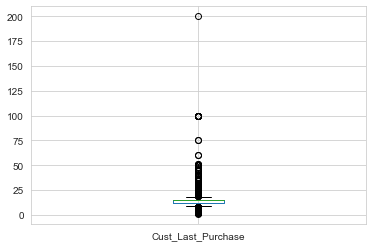

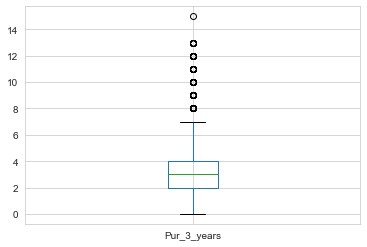

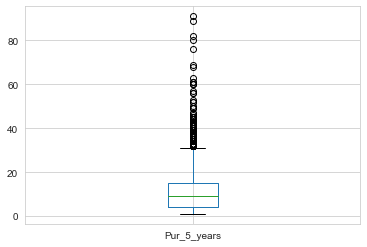

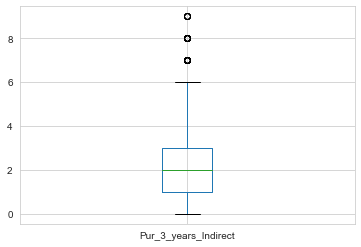

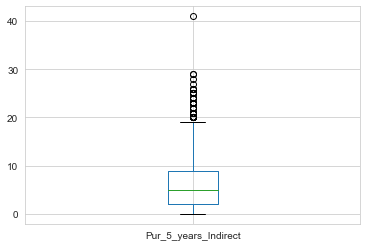

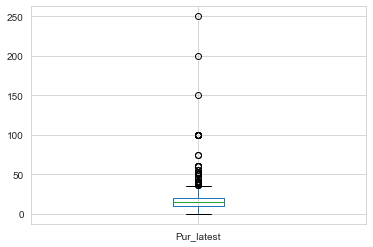

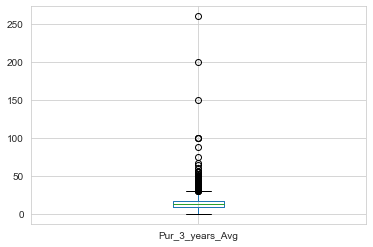

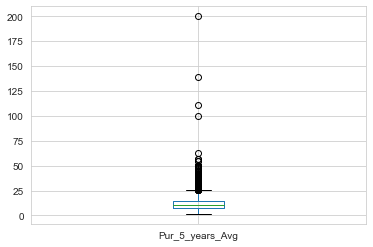

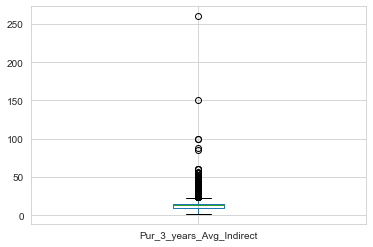

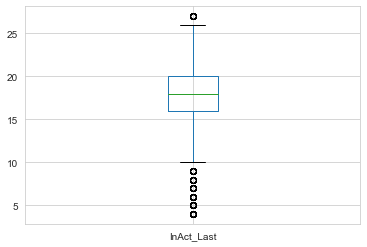

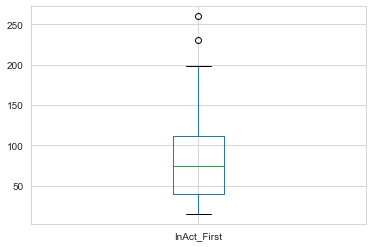

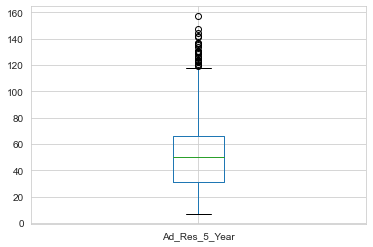

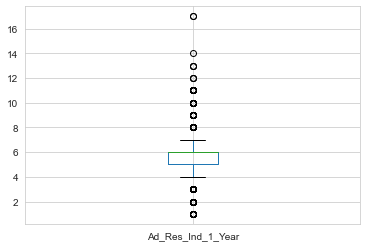

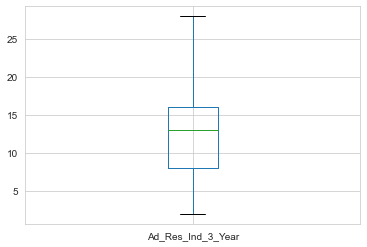

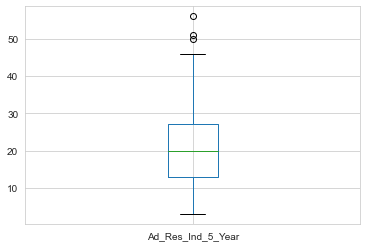

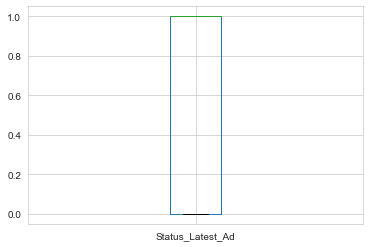

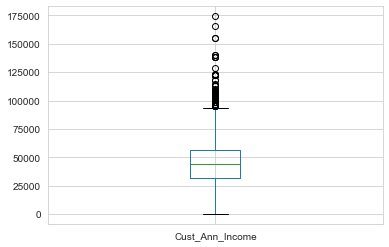

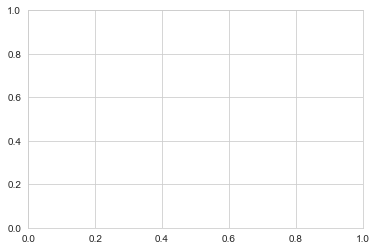

In [165]:
for i in data_x:
    plt.figure()
    data_x.boxplot([i])

import scipy.stats
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75 - q25
iqr

### Pandas to SQL

#### Load the data into a Sql database, customers
Hint: Create database with name Customers
Use pandas to connect and load the dataframe to DATABASE

In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

### Once you have created a database, use either SQL or Python to query the data and solve these questions

In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

### Write a query that returns:

#### a) What percentage of female customers own a house? 

In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

#### b) How much is the average salary of these customers?

In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

### Write a query that returns:

#### a) What percentage of purchases are made through external links (indirect buys)?


In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

#### b) How many purchases have been made by new buyers through external links?

In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

### Write a query that calculate:

#### The average amount of purchases that have been made by Star Buyers?

In [ ]:
#Your Code Here

In [ ]:
#Your Code Here